In [1]:
from sklearn import model_selection, linear_model, metrics
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

## Test №1

In [2]:
data = pd.read_table('water.txt')

In [3]:
data

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [4]:
mortality_mean = data['mortality'][:].mean()
mortality_mean_std = data['mortality'][:].std(ddof=1) / np.sqrt(len(data))

print("Mean 95%% confidence interval", _tconfint_generic(mortality_mean,
                                                         mortality_mean_std,
                                                         len(data) - 1,
                                                         0.05, 'two-sided'))

Mean 95%% confidence interval (1476.0833413552848, 1572.2117406119285)


In [5]:
south_data = data[data['location'] == 'South']

mortality_mean = south_data['mortality'][:].mean()
mortality_mean_std = south_data['mortality'][:].std(ddof=1) / np.sqrt(len(south_data))

print("Mean 95%% confidence interval", _tconfint_generic(mortality_mean,
                                                         mortality_mean_std,
                                                         len(south_data) - 1,
                                                         0.05, 'two-sided'))

Mean 95%% confidence interval (1320.1517462936238, 1433.463638321761)


In [6]:
North_data = data[data['location'] == 'North']

mortality_mean = North_data['mortality'][:].mean()
mortality_mean_std = North_data['mortality'][:].std(ddof=1) / np.sqrt(len(North_data))

print("Mean 95%% confidence interval", _tconfint_generic(mortality_mean,
                                                         mortality_mean_std,
                                                         len(North_data) - 1,
                                                         0.05, 'two-sided'))

Mean 95%% confidence interval (1586.5605251961385, 1680.6394748038613)


In [7]:
south_data = data[data['location'] == 'South']

mortality_mean = south_data['hardness'][:].mean()
mortality_mean_std = south_data['hardness'][:].std(ddof=1) / np.sqrt(len(south_data))

print("Mean 95%% confidence interval", _tconfint_generic(mortality_mean,
                                                         mortality_mean_std,
                                                         len(south_data) - 1,
                                                         0.05, 'two-sided'))

North_data = data[data['location'] == 'North']

mortality_mean = North_data['hardness'][:].mean()
mortality_mean_std = North_data['hardness'][:].std(ddof=1) / np.sqrt(len(North_data))

print("Mean 95%% confidence interval", _tconfint_generic(mortality_mean,
                                                         mortality_mean_std,
                                                         len(North_data) - 1,
                                                         0.05, 'two-sided'))

Mean 95%% confidence interval (53.467198692036106, 86.07126284642544)
Mean 95%% confidence interval (21.42248728572426, 39.37751271427574)


In [8]:
(1.96*1/0.1)**2

384.1599999999999

## Test №2

In [3]:
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import samplesize_confint_proportion
import scipy.stats as sts
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/mateliparteliani/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
normal_interval = proportion_confint(1, 50, alpha=0.05, method = 'normal')
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.000000, 0.058805] with width 0.058805


In [11]:
wilson_interval = proportion_confint(1, 50, alpha=0.05, method = 'wilson')
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.003539, 0.104954] with width 0.101415


In [12]:
n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))
n_samples

753

Proportion_confint не дает нужного резульатата, т.к. он выдает только положительный интревал, поэтому примерняем написанную отдельно функцию proportion_confint_2

In [13]:
def proportion_confint_2(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = sts.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [14]:
proportion_confint_2(1, 50, alpha=0.05, method = 'normal')

(-0.018805307081790987, 0.05880530708179099)

In [15]:
n_size = lambda p: int(np.ceil(samplesize_confint_proportion(p, 0.01)))
n_samples_arr = [n_size(p/100) for p in range(1,101)]

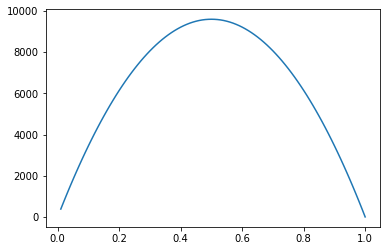

In [16]:
pylab.plot(np.array(range(1,101))/100, n_samples_arr)

In [17]:
print(max(n_samples_arr), "элементов выборки нужно в худшем случае")

9604 элементов выборки нужно в худшем случае


## Test №3


In [2]:
import random
import scipy
from scipy.integrate import quad

In [19]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [20]:
aspirin_stat = np.array([0]*11037)
for i in range(104):
    aspirin_stat[i] = 1

platsebo_stat = np.array([0]*11034)
for i in range(189):
    platsebo_stat[i] = 1

In [21]:
print("confidence interval: [%f, %f]" % proportions_confint_diff_ind(platsebo_stat, aspirin_stat))

confidence interval: [0.004688, 0.010724]


In [22]:
s1, s2 = 11037, 11034
w1, w2 = 104, 189
print(round((w2 / (s2 - w2)) / (w1 / (s1 - w1)),4))

1.8321


In [23]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

np.random.seed(0)
chance_aspirin = list(map(lambda x: sum(x) / (size(x) - sum(x)), get_bootstrap_samples(aspirin_stat, 1000)))
chance_platsebo = list(map(lambda x: sum(x) / (size(x) - sum(x)), get_bootstrap_samples(platsebo_stat, 1000)))

In [25]:
delta_scores = list(map(lambda x: x[1] / x[0], zip(chance_aspirin, chance_platsebo)))
print("95% confidence interval for the difference between chances",  stat_intervals(delta_scores, 0.05))

95% confidence interval for the difference between chances [1.44419465 2.34321168]


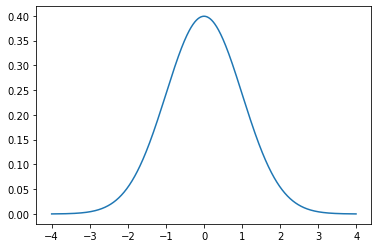

In [35]:
x = np.array(range(-400, 400)) / 100
y = np.sqrt(2 * np.pi)**(-1) * np.e**(-0.5 * x**2)
pylab.plot(x,y)

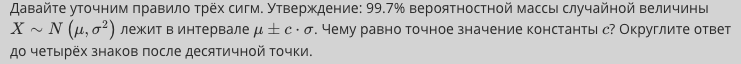
Для этого нужно посчитать квантиль порядка (1 - a/2), где a = 0.003 

In [74]:
sts.norm.ppf(0.9985)

2.9677379253417944

## Test №4

In [78]:
n = 100
F_H0 = sts.binom(n, 0.5)

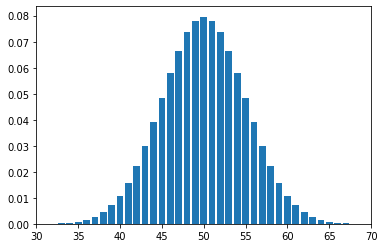

In [82]:
x = np.linspace(0,100,101)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(30, 70) 
pylab.show()

In [182]:
sts.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.08222258891386608

In [97]:
sts.binom_test(67, 100, 0.5, alternative = 'two-sided')

0.0004368599184561863

In [99]:
pines = pd.read_table('pines.txt')

In [107]:
pines

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4
...,...,...
579,169.1,160.0
580,162.5,157.3
581,156.7,155.3
582,154.1,150.8


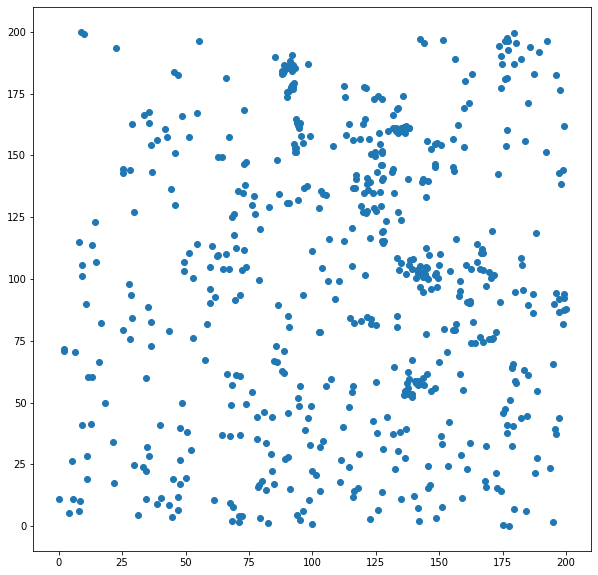

In [132]:
pylab.figure(figsize=(10,10))
pylab.scatter([pines.iloc[i][1] for i in range(584)],
           [pines.iloc[i][0] for i in range(584)])
pylab.show()

In [249]:
'''Не понятно, почему эта функция выдает ошибку. Решил в итоге сам ее реализовать для данной задачи '''
# x = np.array([pines.iloc[i][1] for i in range(584)])
# y = np.array([pines.iloc[i][0] for i in range(584)])
# binx = [0, 40, 80, 120, 160, 200]
# biny = [0, 40, 80, 120, 160, 200]
# ret = sts.binned_statistic_2d(x, y, None, 'count', bins=[binx, biny], expand_binnumbers=False)
# ret.statistic

'Не понятно, почему эта функция выдает ошибку. Решил в итоге сам ее реализовать для данной задачи '

In [260]:
x = np.array([pines.iloc[i][1] for i in range(584)])
y = np.array([pines.iloc[i][0] for i in range(584)])
binx = [0, 40, 80, 120, 160, 200]
biny = [0, 40, 80, 120, 160, 200]

l_x = len(binx) - 1
l_y = len(biny) - 1
arr = np.zeros((l_x,l_y))
for a, b in zip(x,y):
    for i in range(l_x):
        if (a >= binx[i]) & (a <= binx[i + 1]):
            for j in range(l_y):
                if (b >= biny[j]) & (b <= biny[j + 1]):
                    arr[i][j] += 1
                    break
            break
print(arr)
print("Если считать, что деревья распределены равномерно, то средне в квадрате %f деревьев" % (arr.mean()))
arr = arr.astype(int)
arr_vector = np.concatenate(arr)

[[18. 14. 12.  8.  7.]
 [26. 12. 24. 19.  8.]
 [29. 22. 15. 31. 37.]
 [25. 34. 50. 51. 27.]
 [20. 25. 37.  7. 26.]]
Если считать, что деревья распределены равномерно, то средне в квадрате 23.360000 деревьев


In [278]:
sts.chisquare(arr_vector)

Power_divergenceResult(statistic=152.64383561643837, pvalue=1.0673541072122936e-20)

In [273]:
sts.chisquare(arr_vector, [584/25]*25, ddof = 0)

Power_divergenceResult(statistic=152.64383561643837, pvalue=1.0673541072122936e-20)

ПОПРОБОВАТЬ
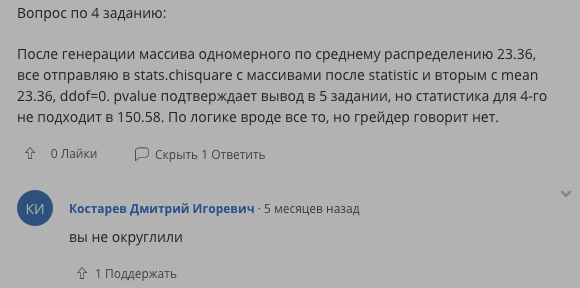

Почему-то результат 150.59 подходит. В чем проблема?

In [9]:
sts.binom_test(20, 22, 0.5, alternative='greater')

6.055831909179691e-05